In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
pwd = os.getcwd()
print(pwd)

f:\research\NbN_MS_project\comments_on_draft1\VS_code


In [3]:
raw_df = pd.read_excel(pwd + '/data/NbN_new_feature_added.xlsx')
print(f'Shape of the imported dataset is: ', raw_df.shape)
raw_df.head()

Shape of the imported dataset is:  (94, 14)


,method,substrate,temperature,pressure,thickness,specific_heat,e_conductivity,atomic_radius,ionic_radius,ρ,Eg,Eip1,Eip2,Tc_K
0,DcMs,Al2O3,600.0,6.756078,4.3,0.912,0.1508,0.962,1.026,3.95,7.0,1018.8,2759.48,11.00
1,DcMs,Al2O3,600.0,6.756078,4.4,0.912,0.1508,0.962,1.026,3.95,7.0,1018.8,2759.48,11.30
2,DcMs,Al2O3,600.0,6.756078,4.4,0.912,0.1508,0.962,1.026,3.95,7.0,1018.8,2759.48,11.10
3,DcMs,Al2O3,600.0,6.756078,10.0,0.912,0.1508,0.962,1.026,3.95,7.0,1018.8,2759.48,14.30
4,DcMs,Al2O3,750.0,0.500000,3.2,0.912,0.1508,0.962,1.026,3.95,7.0,1018.8,2759.48,9.87


In [4]:
"""plt.style.use('ggplot')
a = [i for i in range(raw_df.shape[0])]

plt.figure(dpi=300)
plt.plot(raw_df['Tc_K'], lw=0.3, c='b')
plt.scatter(a, raw_df['Tc_K'], c='r')
#plt.scatter(df['T_c (K)'], df['T_c (K)'], lw=2, c='r')
plt.xlabel('Sample')
plt.ylabel('Tc (K)')
plt.show()"""

"plt.style.use('ggplot')\na = [i for i in range(raw_df.shape[0])]\n\nplt.figure(dpi=300)\nplt.plot(raw_df['Tc_K'], lw=0.3, c='b')\nplt.scatter(a, raw_df['Tc_K'], c='r')\n#plt.scatter(df['T_c (K)'], df['T_c (K)'], lw=2, c='r')\nplt.xlabel('Sample')\nplt.ylabel('Tc (K)')\nplt.show()"

In [5]:
def percentageOfnull(df):
    nan_count = df.isna().sum().sort_values(ascending=False)
    nan_percentage = ((df.isna().sum()/df.isna().count())*100).sort_values(ascending=False)
    train_test_dtype = df.dtypes
    df_info = pd.concat([nan_count,nan_percentage,train_test_dtype],axis=1,keys=['Null Count','Null Percentage','DataTypes'])
    return df_info[df_info['Null Count']>0]


percentageOfnull(raw_df)

,Null Count,Null Percentage,DataTypes


In [6]:
numerical_feats = list(raw_df.drop('Tc_K',axis=1).select_dtypes(include='number'))
categorical_feats = list(raw_df.select_dtypes(exclude='number'))

print(numerical_feats, end="\n\n")
print(categorical_feats, end="\n\n")

['temperature', 'pressure', 'thickness', 'specific_heat', 'e_conductivity', 'atomic_radius', 'ionic_radius', 'ρ', 'Eg', 'Eip1', 'Eip2']

['method', 'substrate']



In [7]:
df = raw_df.copy()
df.head()

,method,substrate,temperature,pressure,thickness,specific_heat,e_conductivity,atomic_radius,ionic_radius,ρ,Eg,Eip1,Eip2,Tc_K
0,DcMs,Al2O3,600.0,6.756078,4.3,0.912,0.1508,0.962,1.026,3.95,7.0,1018.8,2759.48,11.00
1,DcMs,Al2O3,600.0,6.756078,4.4,0.912,0.1508,0.962,1.026,3.95,7.0,1018.8,2759.48,11.30
2,DcMs,Al2O3,600.0,6.756078,4.4,0.912,0.1508,0.962,1.026,3.95,7.0,1018.8,2759.48,11.10
3,DcMs,Al2O3,600.0,6.756078,10.0,0.912,0.1508,0.962,1.026,3.95,7.0,1018.8,2759.48,14.30
4,DcMs,Al2O3,750.0,0.500000,3.2,0.912,0.1508,0.962,1.026,3.95,7.0,1018.8,2759.48,9.87


In [8]:
numerical_feats = list(df.drop('Tc_K', axis=1).select_dtypes(include='number'))
categorical_feats = list(df.select_dtypes(exclude='number'))

for col in df.select_dtypes(exclude=['number']):
  print(f'{col:-<30}, {df[col].unique()}')

method------------------------, ['DcMs' 'IBAS' 'RfMs' 'PLD']
substrate---------------------, ['Al2O3' 'GaAs' 'LiNbO3' 'MgF2' 'MgO' 'Si' 'SiN' 'HfO2']


In [9]:
num_feats = [item for item in numerical_feats]
method_list = [df['method'].unique()]
substrate_list = [df['substrate'].unique()]

In [10]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
#from sklearn.preprocessing import StandardScaler

LABELS = df.drop('Tc_K', axis=1).columns
encoder = LabelEncoder()
for col in LABELS:
    # Check if object
    if df[col].dtype == 'O':
        df[col] = encoder.fit_transform(df[col])
        
    elif df[col].dtype == 'bool':
        df[col] = df[col].astype('int')

#scaler = MinMaxScaler()

# Apply Standard Scaling
#df[num_feats] = scaler.fit_transform(df[num_feats])
df.head()

,method,substrate,temperature,pressure,thickness,specific_heat,e_conductivity,atomic_radius,ionic_radius,ρ,Eg,Eip1,Eip2,Tc_K
0,0,0,600.0,6.756078,4.3,0.912,0.1508,0.962,1.026,3.95,7.0,1018.8,2759.48,11.00
1,0,0,600.0,6.756078,4.4,0.912,0.1508,0.962,1.026,3.95,7.0,1018.8,2759.48,11.30
2,0,0,600.0,6.756078,4.4,0.912,0.1508,0.962,1.026,3.95,7.0,1018.8,2759.48,11.10
3,0,0,600.0,6.756078,10.0,0.912,0.1508,0.962,1.026,3.95,7.0,1018.8,2759.48,14.30
4,0,0,750.0,0.500000,3.2,0.912,0.1508,0.962,1.026,3.95,7.0,1018.8,2759.48,9.87


In [11]:
encoded_method = [df['method'].unique()]
encoded_substrate = [df['substrate'].unique()]

from itertools import chain
df_method = pd.DataFrame()
df_substrate = pd.DataFrame()

df_method['method'] = pd.Series(list(chain.from_iterable(method_list)))
df_substrate['substrate'] = pd.Series(list(chain.from_iterable(substrate_list)))
df_method['Encoded_method'] = pd.Series(list(chain.from_iterable(encoded_method)))
df_substrate['Encoded_substrate'] = pd.Series(list(chain.from_iterable(encoded_substrate)))


print(df_method)
print(df_substrate)

  method  Encoded_method
0   DcMs               0
1   IBAS               1
2   RfMs               3
3    PLD               2
  substrate  Encoded_substrate
0     Al2O3                  0
1      GaAs                  1
2    LiNbO3                  3
3      MgF2                  4
4       MgO                  5
5        Si                  6
6       SiN                  7
7      HfO2                  2


In [12]:
X = df.drop(["Tc_K"], axis=1)
X = X.astype(np.float32)
y = df["Tc_K"]
print('Shape of X and y are: {} and {}'.format(X.shape, y.shape))

Shape of X and y are: (94, 13) and (94,)


In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

print('Shapes of X_train, y_train, X_test, and y_test are {}, {}, {} and {}'.format(X_train.shape, y_train.shape, X_test.shape, y_test.shape))

Shapes of X_train, y_train, X_test, and y_test are (75, 13), (75,), (19, 13) and (19,)


In [14]:
Models = []
R2 = []
MSE = []
RMSE = []
MAE = []

In [15]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [20]:
def prediction_error_plot(predicted_train, predicted_test, y1=y_train, y2=y_test):
    plt.style.use('default')
    plt.figure()
    plt.scatter(y1, predicted_train, c='r', label='Train data')
    plt.scatter(y2, predicted_test, c='b', label='Test data')
    plt.plot(y_train, y_train, c='r')
    plt.xlabel('Actual $T_{c}$ (K)')
    plt.ylabel('Predicted $T_{c}$ (K)')
    plt.legend()
    return plt.show()

In [21]:
def model_builder(model_name):
    model_name.fit(X_train, y_train)
    y_pred_train = model_name.predict(X_train)
    y_pred_test = model_name.predict(X_test)

    
    mse = mean_squared_error(y_test, y_pred_test)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred_test)
    print("The mean squared error (MSE) on test set: {:.4f}".format(mse))
    print("The root mean squared error (RMSE) on test set: {:.4f}".format(rmse))
    print("The mean absolute error (MAE) on test set: {:.4f}".format(mae))

    r2_train = r2_score(y_train, y_pred_train)
    r2_test = r2_score(y_test, y_pred_test)

    print("r2 on train set: {:.4f}".format(r2_train))
    print("r2 on test set: {:.4f}".format(r2_test))
    prediction_error_plot(y_pred_train, y_pred_test)

In [22]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error


rf = RandomForestRegressor(random_state = 42)

The mean squared error (MSE) on test set: 3.2934
The root mean squared error (RMSE) on test set: 1.8148
The mean absolute error (MAE) on test set: 1.4049
r2 on train set: 0.9094
r2 on test set: 0.3958


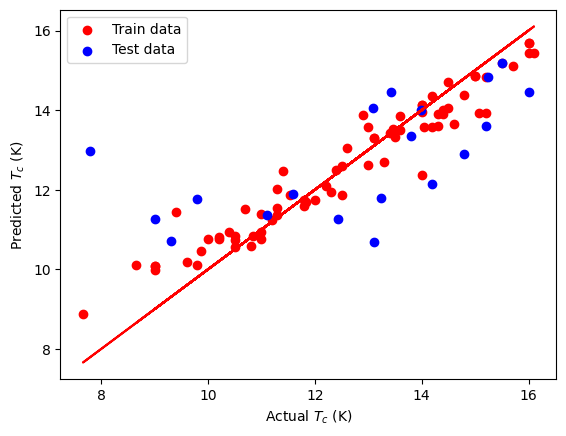

In [23]:
model_builder(rf)

The mean squared error (MSE) on test set: 2.9393
The root mean squared error (RMSE) on test set: 1.7144
The mean absolute error (MAE) on test set: 1.3671
r2 on train set: 0.8840
r2 on test set: 0.4607


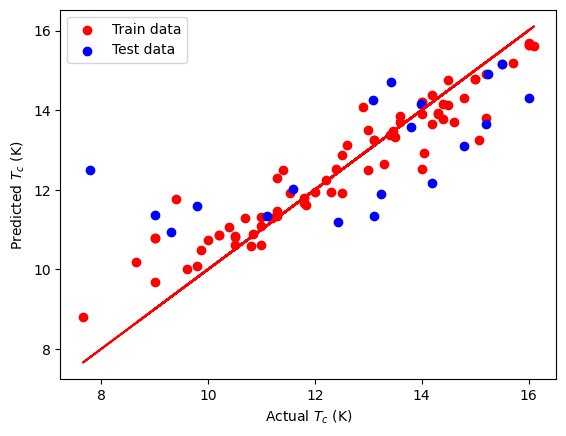

In [24]:
tuned_rf = RandomForestRegressor(max_depth = 30 , min_samples_leaf = 1
                                      , max_features=1.0, n_estimators=30, n_jobs=-1 , random_state = 42)


model_builder(tuned_rf)

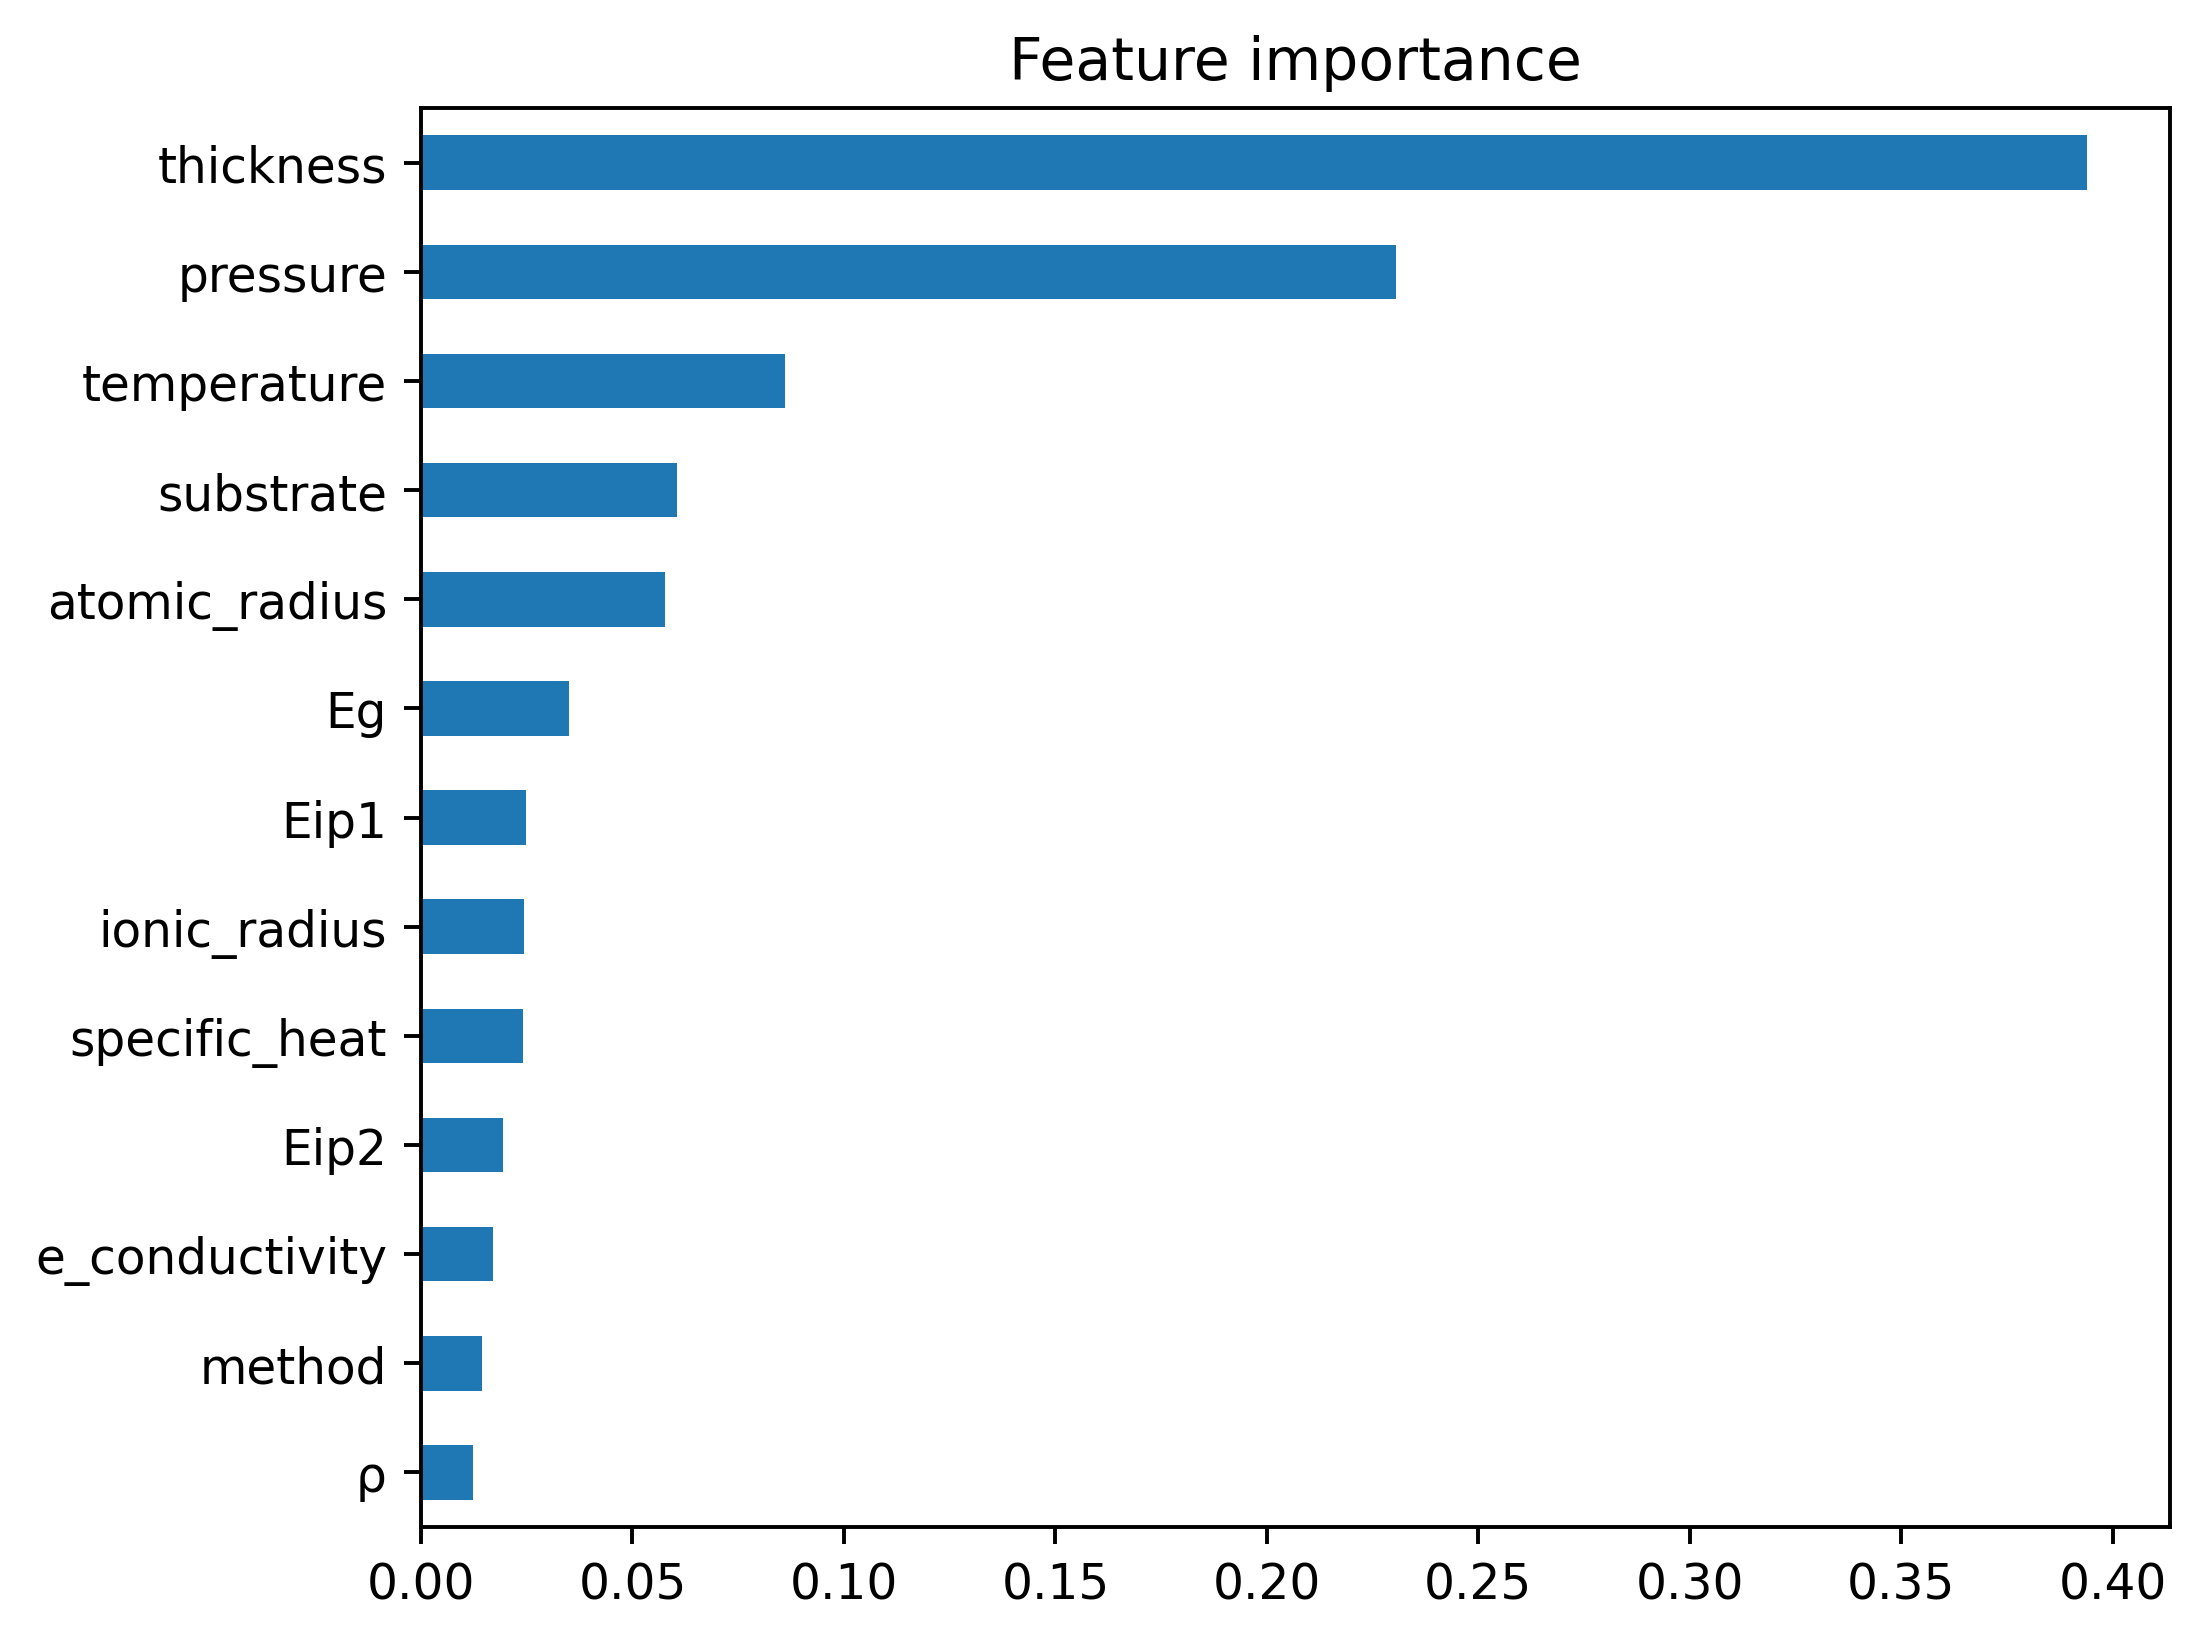

In [25]:
feature_names = tuned_rf.feature_names_in_

#pd.set_option('precision', 2)
mdi_importances = pd.Series(
    tuned_rf.feature_importances_, index=feature_names
).sort_values(ascending=True)

plt.style.use('default')
plt.figure(dpi=350)
ax = mdi_importances.plot.barh()
ax.set_title("Feature importance")
ax.figure.tight_layout()
#plt.savefig(pwd + '/figures/feature_importance.png', dpi=1000, bbox_inches="tight")

The mean squared error (MSE) on test set: 3.6140
The root mean squared error (RMSE) on test set: 1.9010
The mean absolute error (MAE) on test set: 1.5391
r2 on train set: 0.4236
r2 on test set: 0.3369


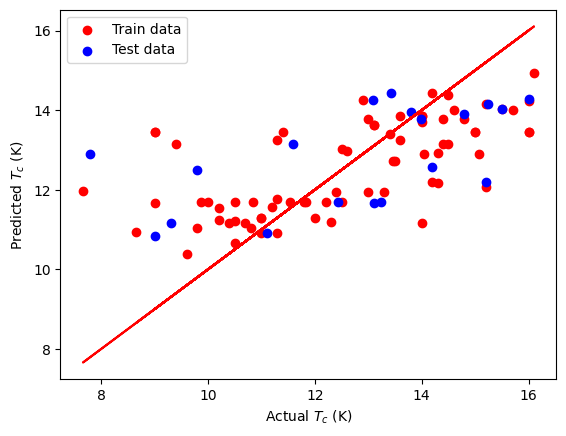

In [26]:
import lightgbm as lgb

lgb = lgb.LGBMRegressor(seed=20)
model_builder(lgb)

The mean squared error (MSE) on test set: 3.9772
The root mean squared error (RMSE) on test set: 1.9943
The mean absolute error (MAE) on test set: 1.7101
r2 on train set: 0.5496
r2 on test set: 0.2703


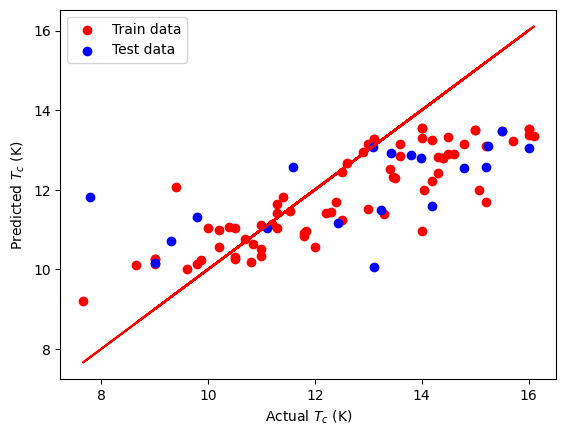

In [27]:
import xgboost as xgb

xgb = xgb.XGBRegressor(n_estimators=300, max_depth=3, eta=0.01, subsample=0.7, colsample_bytree=0.8, seed=42)
model_builder(xgb)

In [28]:
"""feature_importance_df = pd.DataFrame()
feature_importance_df["feature"] = X_train.columns
feature_importance_df["importance"] = xgb.feature_importances_

feature_importance_df  = feature_importance_df.sort_values('importance', ascending=False).reset_index()
plt.figure(figsize = (10, 10))
sns.barplot(x ='importance', y ='feature', data= feature_importance_df[:13])"""

'feature_importance_df = pd.DataFrame()\nfeature_importance_df["feature"] = X_train.columns\nfeature_importance_df["importance"] = xgb.feature_importances_\n\nfeature_importance_df  = feature_importance_df.sort_values(\'importance\', ascending=False).reset_index()\nplt.figure(figsize = (10, 10))\nsns.barplot(x =\'importance\', y =\'feature\', data= feature_importance_df[:13])'

In [29]:
"""import shap

# Initialize SHAP Tree explainer
explainer = shap.TreeExplainer(xgb, model_output='margin')
shap_values = explainer.shap_values(X_train)

# Baseline value
expected_value = explainer.expected_value
if isinstance(expected_value, list):
    expected_value = expected_value[1]
print(f"Explainer expected value: {expected_value}")


# summarize the effects of all the features
plt.figure(dpi=350)
shap.summary_plot(shap_values, X_train)"""

'import shap\n\n# Initialize SHAP Tree explainer\nexplainer = shap.TreeExplainer(xgb, model_output=\'margin\')\nshap_values = explainer.shap_values(X_train)\n\n# Baseline value\nexpected_value = explainer.expected_value\nif isinstance(expected_value, list):\n    expected_value = expected_value[1]\nprint(f"Explainer expected value: {expected_value}")\n\n\n# summarize the effects of all the features\nplt.figure(dpi=350)\nshap.summary_plot(shap_values, X_train)'

The mean squared error (MSE) on test set: 1.3035
The root mean squared error (RMSE) on test set: 1.1417
The mean absolute error (MAE) on test set: 0.9362
r2 on train set: 0.9236
r2 on test set: 0.7608


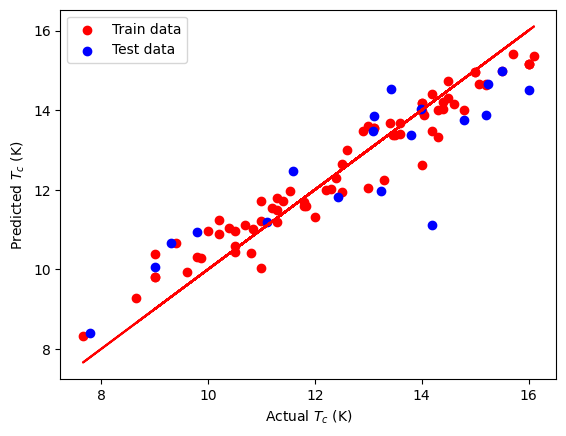

In [30]:
params = {
    "n_estimators": 500,
    "max_depth": 5,
    "min_samples_split": 13,
    "learning_rate": 0.01,
    "loss": "squared_error",
}

from sklearn import ensemble
gbr = ensemble.GradientBoostingRegressor(**params)
model_builder(gbr)

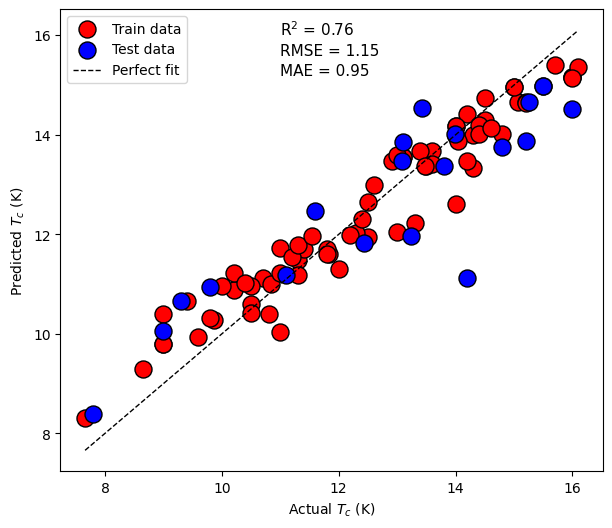

In [31]:
predicted_train = gbr.predict(X_train)
predicted_test = gbr.predict(X_test)

plt.style.use('default')
plt.figure(figsize=(7,6))
plt.scatter(y_train, predicted_train, c='r', label='Train data', edgecolors=(0, 0, 0), marker="o", s=150)
plt.scatter(y_test, predicted_test, c='b', label='Test data', edgecolors=(0, 0, 0), marker="o", s=150)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=1, label='Perfect fit')

plt.text(11,16, 'R$^{2}$ = 0.76', fontsize=11)
plt.text(11,15.6, 'RMSE = 1.15', fontsize=11)
plt.text(11,15.2, 'MAE = 0.95', fontsize=11)

plt.xlabel('Actual $T_{c}$ (K)')
plt.ylabel('Predicted $T_{c}$ (K)')
plt.legend()
#plt.savefig(pwd + '/figures/cross_validated_predictions.png', dpi=350, bbox_inches="tight")
plt.show()

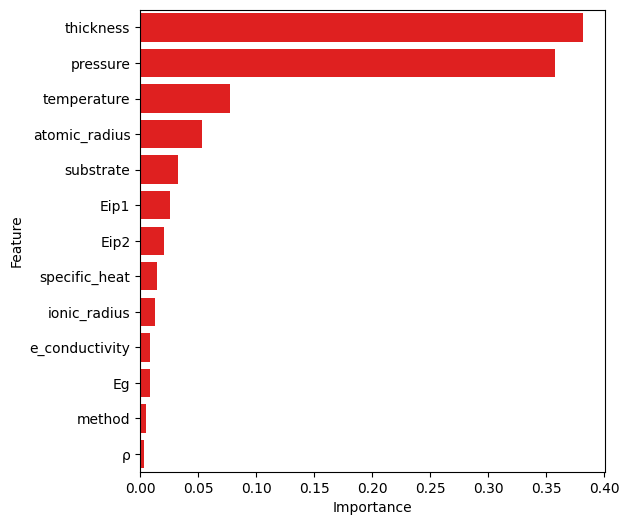

In [32]:
feature_importance_df = pd.DataFrame()
feature_importance_df["Feature"] = X_train.columns
feature_importance_df["Importance"] = gbr.feature_importances_

feature_importance_df  = feature_importance_df.sort_values('Importance', ascending=False).reset_index()
plt.style.use('default')
plt.figure(figsize=(6,6))
ax = sns.barplot(x ='Importance', y ='Feature', data= feature_importance_df, color='red')
#plt.savefig(pwd + '/figures/feature_importance.png', dpi=350, bbox_inches="tight")

In [33]:
feature_importance_df

,index,Feature,Importance
0,4,thickness,0.381573
1,3,pressure,0.357461
2,2,temperature,0.077069
3,7,atomic_radius,0.052908
4,1,substrate,0.032922
5,11,Eip1,0.025418
6,12,Eip2,0.020643
7,5,specific_heat,0.014462
8,8,ionic_radius,0.013083
9,6,e_conductivity,0.008259


model_output = "margin" has been renamed to model_output = "raw"


Explainer expected value: [12.54117011]


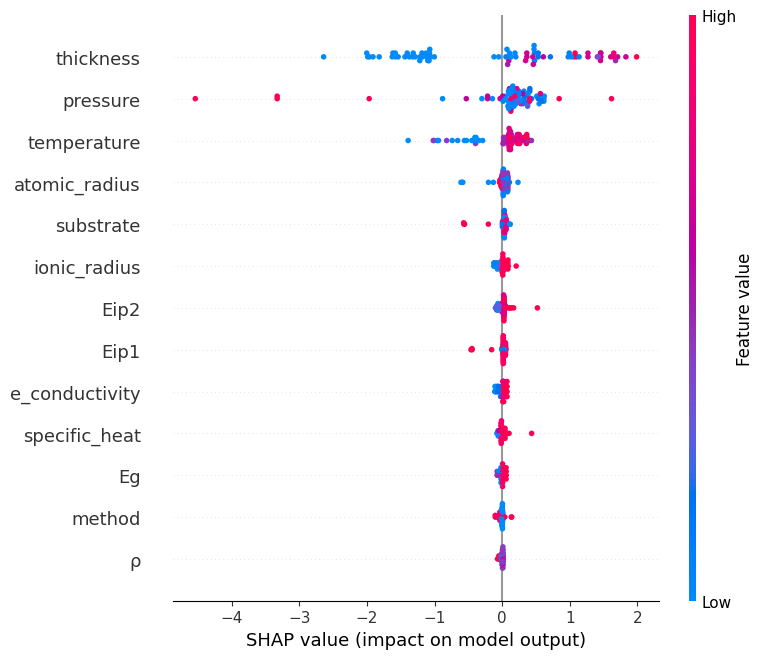

In [78]:
import shap

# Initialize SHAP Tree explainer
explainer = shap.TreeExplainer(gbr, model_output='margin')
shap_values = explainer.shap_values(X_train)

# Baseline value
expected_value = explainer.expected_value
if isinstance(expected_value, list):
    expected_value = expected_value[1]
print(f"Explainer expected value: {expected_value}")


# summarize the effects of all the features
plt.style.use('default')
plt.figure()
shap.summary_plot(shap_values, X_train, max_display=13, show=False)
plt.savefig(pwd + '/shap_values.png', dpi=300, bbox_inches="tight")

In [35]:
"""import pickle

filename = 'GradientBoostingRegressor.sav'
pickle.dump(gbr, open(pwd + '/saved_models/' + filename, 'wb'))"""

"import pickle\n\nfilename = 'GradientBoostingRegressor.sav'\npickle.dump(gbr, open(pwd + '/saved_models/' + filename, 'wb'))"

In [36]:
predicted_Tc = gbr.predict(X)
predicted_Tc = pd.DataFrame(predicted_Tc, columns=['predicted_Tc'])

In [37]:
actual_prediction_df = pd.concat([raw_df, predicted_Tc], axis=1)
actual_prediction_df

,method,substrate,temperature,pressure,thickness,specific_heat,e_conductivity,atomic_radius,ionic_radius,ρ,Eg,Eip1,Eip2,Tc_K,predicted_Tc
0,DcMs,Al2O3,600.0,6.756078,4.3,0.912,0.1508,0.96200,1.026000,3.95,7.00,1018.800000,2759.480000,11.00,11.719476
1,DcMs,Al2O3,600.0,6.756078,4.4,0.912,0.1508,0.96200,1.026000,3.95,7.00,1018.800000,2759.480000,11.30,11.187159
2,DcMs,Al2O3,600.0,6.756078,4.4,0.912,0.1508,0.96200,1.026000,3.95,7.00,1018.800000,2759.480000,11.10,11.187159
3,DcMs,Al2O3,600.0,6.756078,10.0,0.912,0.1508,0.96200,1.026000,3.95,7.00,1018.800000,2759.480000,14.30,13.998399
4,DcMs,Al2O3,750.0,0.500000,3.2,0.912,0.1508,0.96200,1.026000,3.95,7.00,1018.800000,2759.480000,9.87,10.284515
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89,DcMs,GaAs,400.0,0.333306,4.5,0.350,0.0345,1.23500,0.710000,5.32,1.42,762.900000,1888.650000,9.30,10.665325
90,DcMs,GaAs,400.0,0.333306,5.6,0.350,0.0345,1.23500,0.710000,5.32,1.42,762.900000,1888.650000,10.40,11.031401
91,DcMs,GaAs,400.0,0.333306,10.0,0.350,0.0345,1.23500,0.710000,5.32,1.42,762.900000,1888.650000,12.50,12.640560
92,DcMs,GaAs,400.0,0.333306,140.0,0.350,0.0345,1.23500,0.710000,5.32,1.42,762.900000,1888.650000,14.60,14.144419


In [38]:
#actual_prediction_df.to_excel(pwd+'/actual_prediction_df.xlsx', index=False)

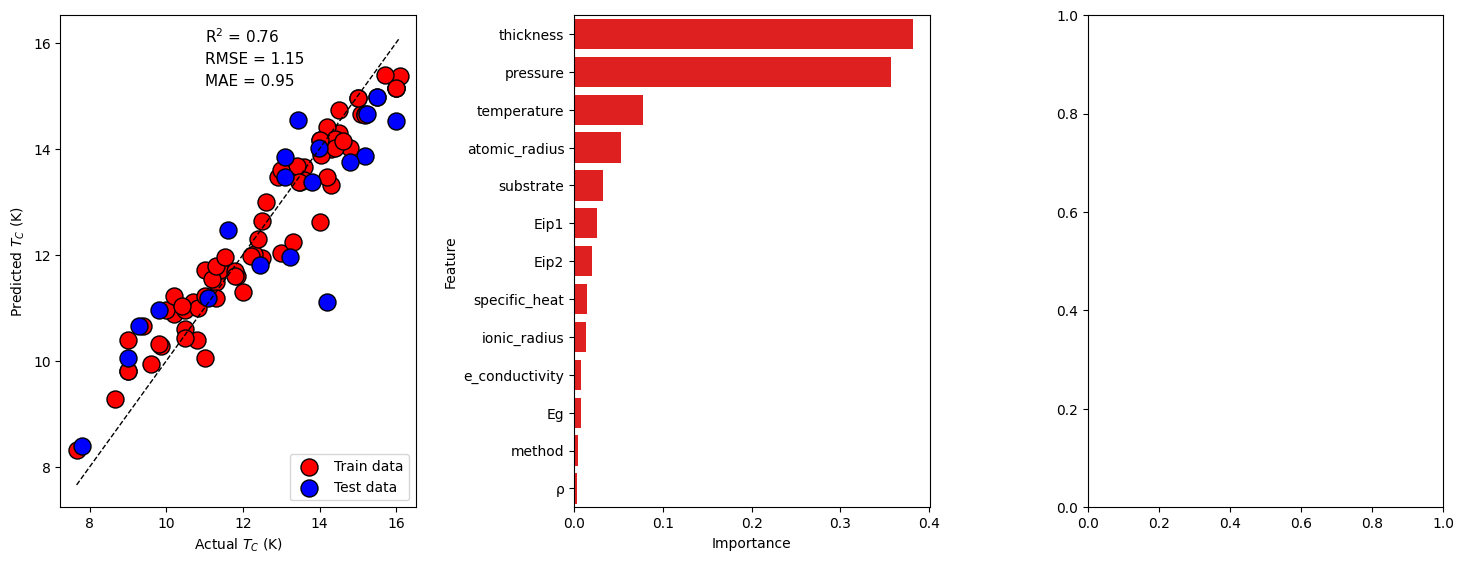

In [80]:
plt.style.use('default')


fig, axes = plt.subplots(1, 3, sharex=False, figsize=(15,6))

axes[0].scatter(y_train, predicted_train, c='r', label='Train data', edgecolors=(0, 0, 0), marker="o", s=150)
axes[0].scatter(y_test, predicted_test, c='b', label='Test data', edgecolors=(0, 0, 0), marker="o", s=150)
axes[0].plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=1)
axes[0].text(11,16, 'R$^{2}$ = 0.76', fontsize=11)
axes[0].text(11,15.6, 'RMSE = 1.15', fontsize=11)
axes[0].text(11,15.2, 'MAE = 0.95', fontsize=11)
axes[0].legend(loc='lower right')


sns.barplot(ax=axes[1], x ='Importance', y ='Feature', data= feature_importance_df, color='red')

#shap.summary_plot(shap_values, X_train, show=False, max_display=13, auto_size_plot=False)

axes[0].set_xlabel('Actual $T_{C}$ (K)')
axes[0].set_ylabel('Predicted $T_{C}$ (K)')

plt.tight_layout(pad=2.0)
#plt.savefig(pwd + '/figures1.png', dpi=300, bbox_inches="tight")
plt.show()